In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Computer Modern Roman'

In [2]:
def system1(t, y, gamma, beta, alpha):
    u, s = y
    du_dt = alpha - beta * u
    ds_dt = beta * u - gamma * s
    return [du_dt, ds_dt]

def system2(t, y, gamma, beta):
    u, s = y
    du_dt =  - beta * u
    ds_dt = beta * u - gamma * s
    return [du_dt, ds_dt]

In [3]:
time = 1000
t_span = [0, time]
t_eval = np.linspace(0, time, time * 10)

In [4]:
u0 = 0; s0 = 0
gamma = 10
beta = 1
alpha = 1
sol_up = solve_ivp(system1, t_span, [u0, s0], args=(gamma, beta, alpha, ), t_eval=t_eval)
sol_down = solve_ivp(system2, t_span, [sol_up.y[0][-1], sol_up.y[1][-1]], args=(gamma, beta,), t_eval=t_eval)

In [16]:
def plot_graphs(alpha, beta, gamma, time, save = False, start_point = None):

    u_color = 'darkorchid'
    s_color = 'darkorange'

    # plot time length
    t_span = [0, time]
    t_eval = np.linspace(0, time, time * 10)
    
    # default starting position
    if start_point is not None:
        u0, s0 = start_point
    else:
        u0 = 0; s0 = 0

    # solve the system
    sol_up = solve_ivp(system1, t_span, [u0, s0], args=(gamma, beta, alpha, ), t_eval=t_eval)
    sol_down = solve_ivp(system2, t_span, [sol_up.y[0][-1], sol_up.y[1][-1]], args=(gamma, beta,), t_eval=t_eval)
    
    fig, axs = plt.subplots(1, 2, figsize=(15, 5), width_ratios=[1, 2])
    # Plot u vs. s
    axs[0].plot(sol_up.y[1], sol_up.y[0], label='Induction', color='firebrick')
    axs[0].plot(sol_down.y[1], sol_down.y[0], label='Repression', color='royalblue')
    s_line = np.linspace(0, sol_up.y[1][-1], 400)
    u_line = gamma / beta * s_line
    axs[0].plot(s_line, u_line, label=r'$u = \frac{\gamma}{\beta} s$', color='0.3', linestyle='--')
    axs[0].set_xlabel(r'$s(t)$')
    axs[0].set_ylabel(r'$u(t)$')
    axs[0].legend()
    axs[0].set_title(r'$u(t)$ vs. $s(t)$')
    # axs[0].set_ylim([0,0.1])

    # Plot s vs. t
    axs[1].axvline(x=time, color='0.7', linestyle='--')
    axs[1].axvline(x=0, color='0.7', linestyle='--')
    axs[1].plot(sol_up.t, sol_up.y[1], label=r'$s(t)$', color=s_color)
    axs[1].plot(sol_down.t + time, sol_down.y[1], color=s_color)
    axs[1].set_ylabel(r'Value')
    axs[1].set_xlabel(r'Time ($t$)')
    axs[1].set_title(r'$s(t)$ vs. Time')

    # Plot u vs. t
    axs[1].axvline(x=time, color='0.7', linestyle='--')
    axs[1].axvline(x=0, color='0.7', linestyle='--')
    axs[1].plot(sol_up.t, sol_up.y[0], label=r'$u(t)$', color=u_color)
    axs[1].plot(sol_down.t + time, sol_down.y[0], color=u_color)
    axs[1].set_ylabel(r'Value')
    axs[1].set_xlabel(r'Time ($t$)')
    axs[1].set_title(r'$u(t)$ vs. Time')

    axs[1].legend()
    
    plt.tight_layout()
    
    if isinstance(save, str):
        plt.savefig(save)


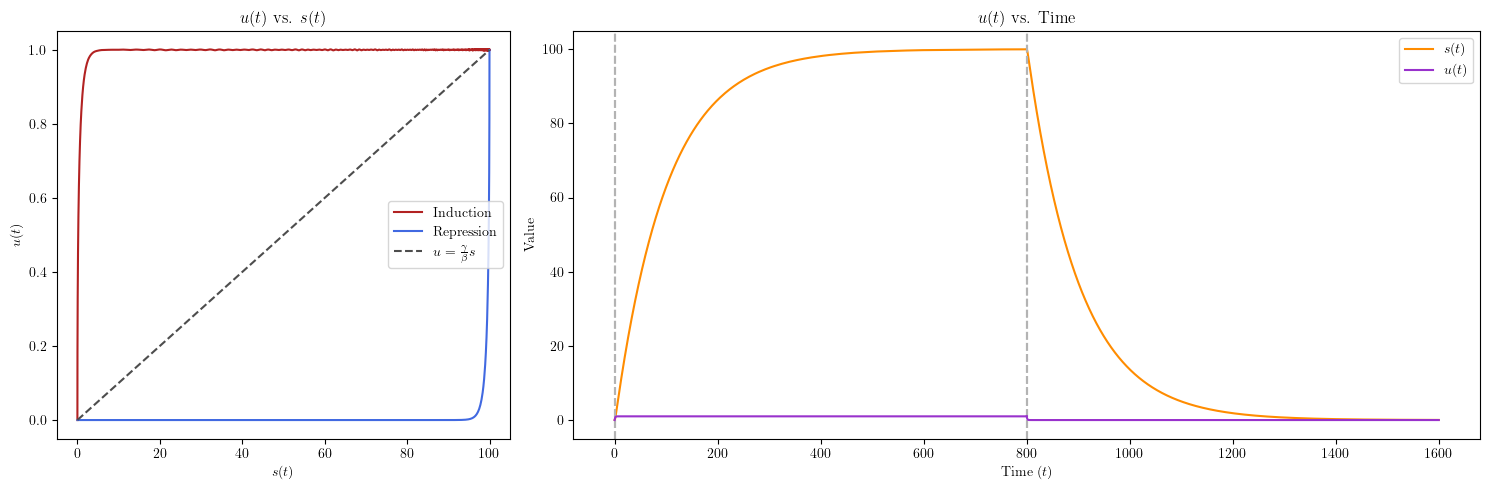

In [17]:
plot_graphs(1, 1, 0.01, 800, save='../figures/fig3_large_beta_a1b1c0.01_t800.png')